# E2a: Küchentischversuch zum Laval-Rotor

Name:  Daniel Hoeflich
Datum:  12.01.2023

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: Wie realistisch wird das Ergebnis sein und in welchen Bereichen befinden sich die Frequenzen?

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="Versuch1.jpg" width="500">
<img src="Versuch1_1.jpg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor wird mit starken Klebeband in die Mitte des PC Lüfters geklebt, des weiteren habe ich ein kleines Gewicht an ein Lüfterblatt geklebt, um höhere Ausschläge zu erreichen.
- Vorgangsbeschreibung: Der Lüfter wurde nun mit dem PC verbunden und im BIOS auf eine feste Geschwindigkeit von 950 U/min eingestellt.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft
path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240112_130522_DanielHoeflich_PC_Fan" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240112_130522_DanielHoeflich_PC_Fan.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

#print(json.dumps(setup_json_dict, indent=2, default=str))
#print(json.dumps(sensor_settings_dict, indent=2, default=str))
#print("Probe: {}".format(probe_name))


#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
path = path_measurement_folder+"/"+h5_file_name
f = h5py.File(path, "r")

# creating empty lists 
x = []
y = []
z = []
timestamp = []

# filling the lists with our values and timestamps
for i, UUID in enumerate (f["RawData"].keys()):
    x.append(list(f["RawData"][UUID]["acceleration_x"]))
    y.append(list(f["RawData"][UUID]["acceleration_y"]))
    z.append(list(f["RawData"][UUID]["acceleration_z"]))
    timestamp.append(list(f["RawData"][UUID]["timestamp"])) 

#converting lists into np.arrays
x = np.array(x[0])
y = np.array(y[0])
z = np.array(z[0])
timestamp = np.array(timestamp[0])

#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [5]:
vec_accel = get_vec_accel(x, y, z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

No handles with labels found to put in legend.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


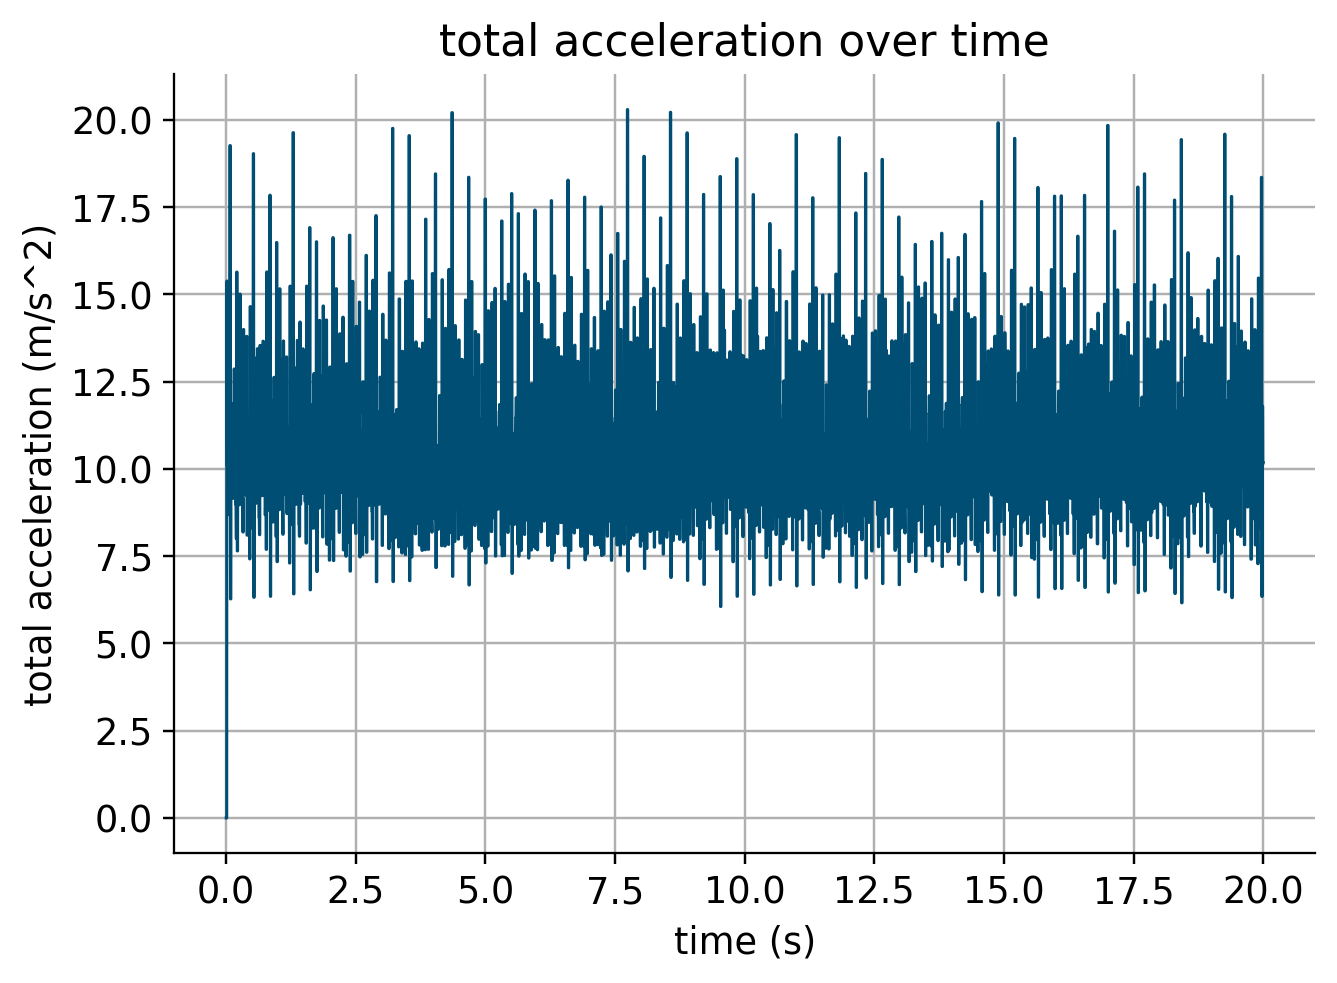

In [6]:
# plotting vec_accel
plt.plot(timestamp, vec_accel,'-', lw=1)

# creating the labels
plt.xlabel('time (s)')
plt.ylabel('total acceleration (m/s^2)')

# creating the title
plt.title('total acceleration over time')

# creating a legend
plt.legend()

# creating a grid to read the data easier 
plt.grid(True)

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
import pprint
(x_interp,y_interp) = interpolation(timestamp, vec_accel)


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

626


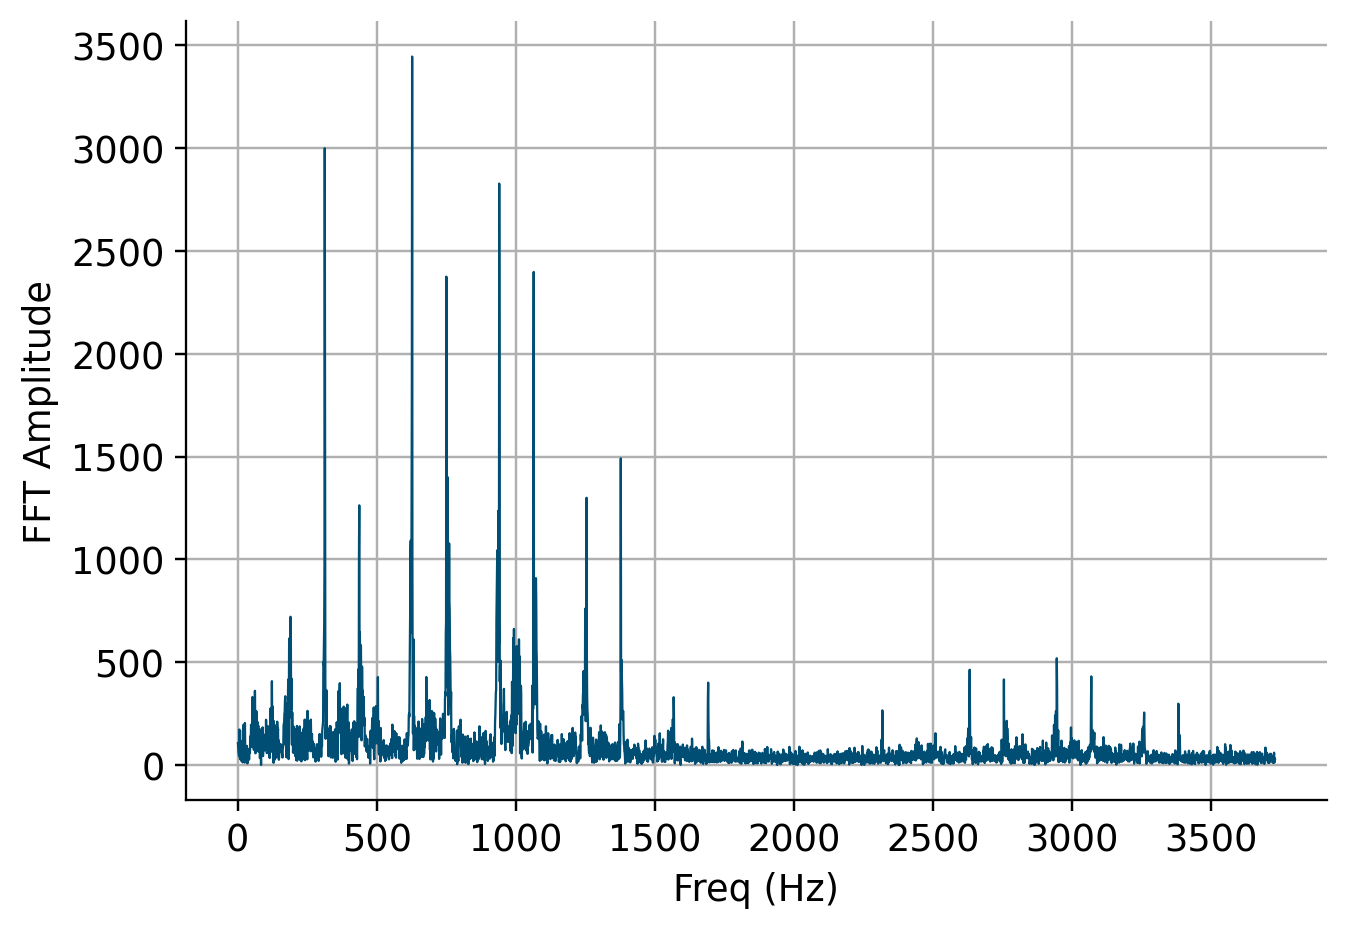

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#calling fft function
amp, freq = my_fft(y_interp,x_interp)

#plotting resulting fft amplitude and frequency 
plt.plot(freq, amp)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')

# creating a grid to read the data easier 
plt.grid(True)

#calculating the peak frequenzy 
max_value = max(amp)
X_abs_list = np.ndarray.tolist(amp)
max_freq = X_abs_list.index(max_value)
print(max_freq)

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="Versuch2.jpg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor wird mit starkem Klebeband an das Handy in die untere Ecke geklebt, dort ist die Vibration am meisten spürbar,
- Vorgangsbeschreibung: Nun wird mithilfe von einer Handy App die Vibration eingeschaltet und die Messung wird gestartet.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = "measurement_data/data_20240111_194136_DanielHoeflich_Handy" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240111_194136_DanielHoeflich_Handy.h5" # replace None by the filename of the hdf5-file

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
path = path_measurement_folder+"/"+h5_file_name
f = h5py.File(path, "r")

# creating empty lists 
x = []
y = []
z = []
timestamp = []

# filling the lists with our values and timestamps
for i, UUID in enumerate (f["RawData"].keys()):
    x.append(list(f["RawData"][UUID]["acceleration_x"]))
    y.append(list(f["RawData"][UUID]["acceleration_y"]))
    z.append(list(f["RawData"][UUID]["acceleration_z"]))
    timestamp.append(list(f["RawData"][UUID]["timestamp"])) 

#converting lists into np.arrays
x = np.array(x[0])
y = np.array(y[0])
z = np.array(z[0])
timestamp = np.array(timestamp[0])

#### 2. Betrag der Beschleunigung berechnen


In [11]:
vec_accel = get_vec_accel(x, y, z)

#### 3. Darstellung der Messdaten

No handles with labels found to put in legend.


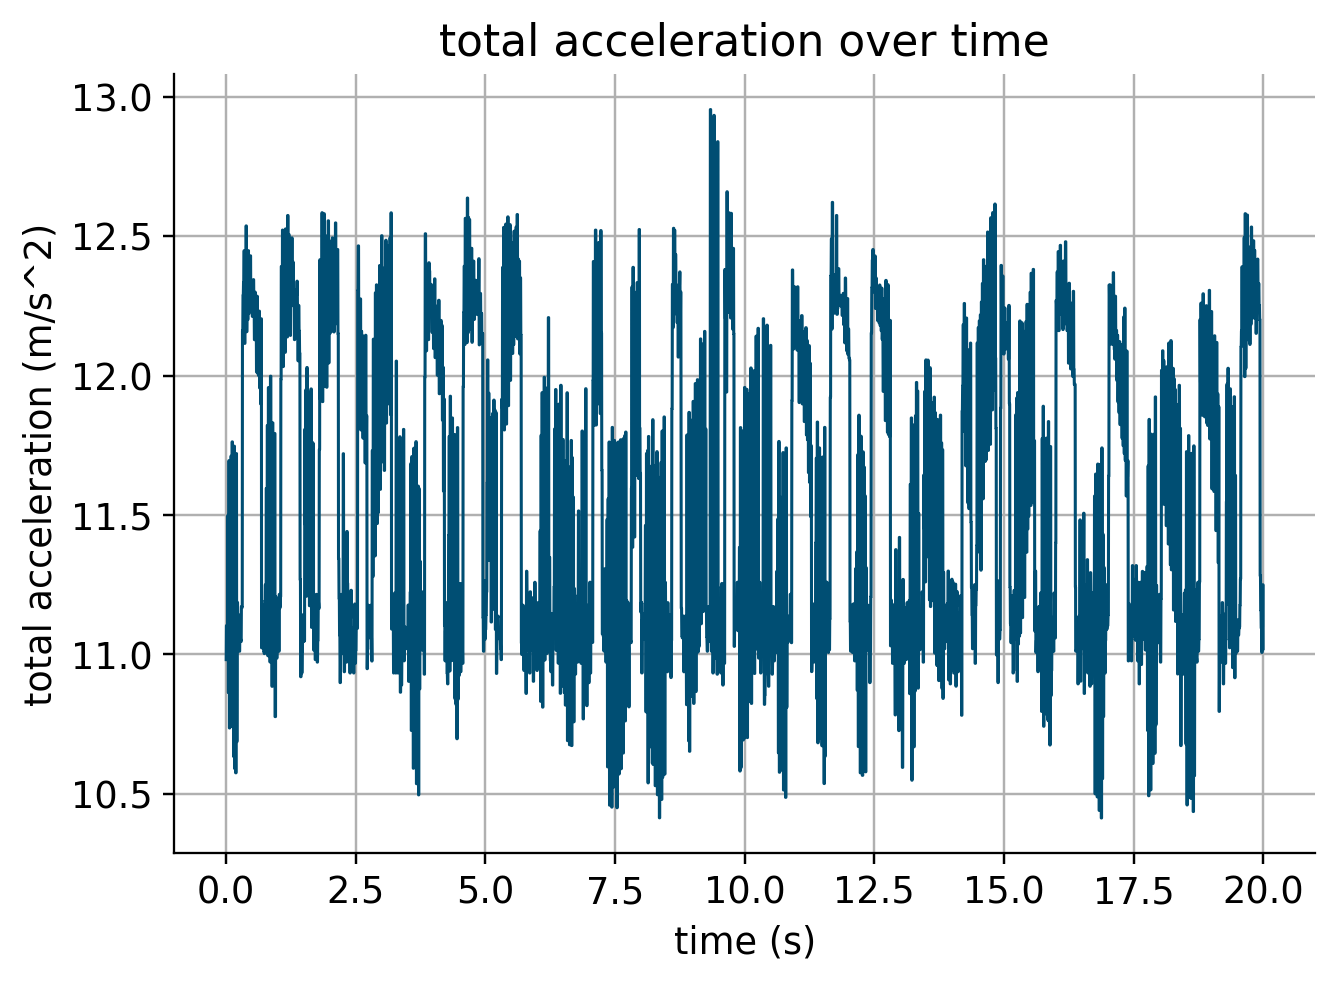

In [12]:
# plotting vec_accel
plt.plot(timestamp, vec_accel,'-', lw=1)

# creating the labels
plt.xlabel('time (s)')
plt.ylabel('total acceleration (m/s^2)')

# creating the title
plt.title('total acceleration over time')

# creating a legend
plt.legend()

# creating a grid to read the data easier 
plt.grid(True)

#### 4. Interpolation der Messwerte



In [13]:
import pprint
(x_interp,y_interp) = interpolation(timestamp, vec_accel)

#### 5 & 6. FFT durchführen und graphisch darstellen


27


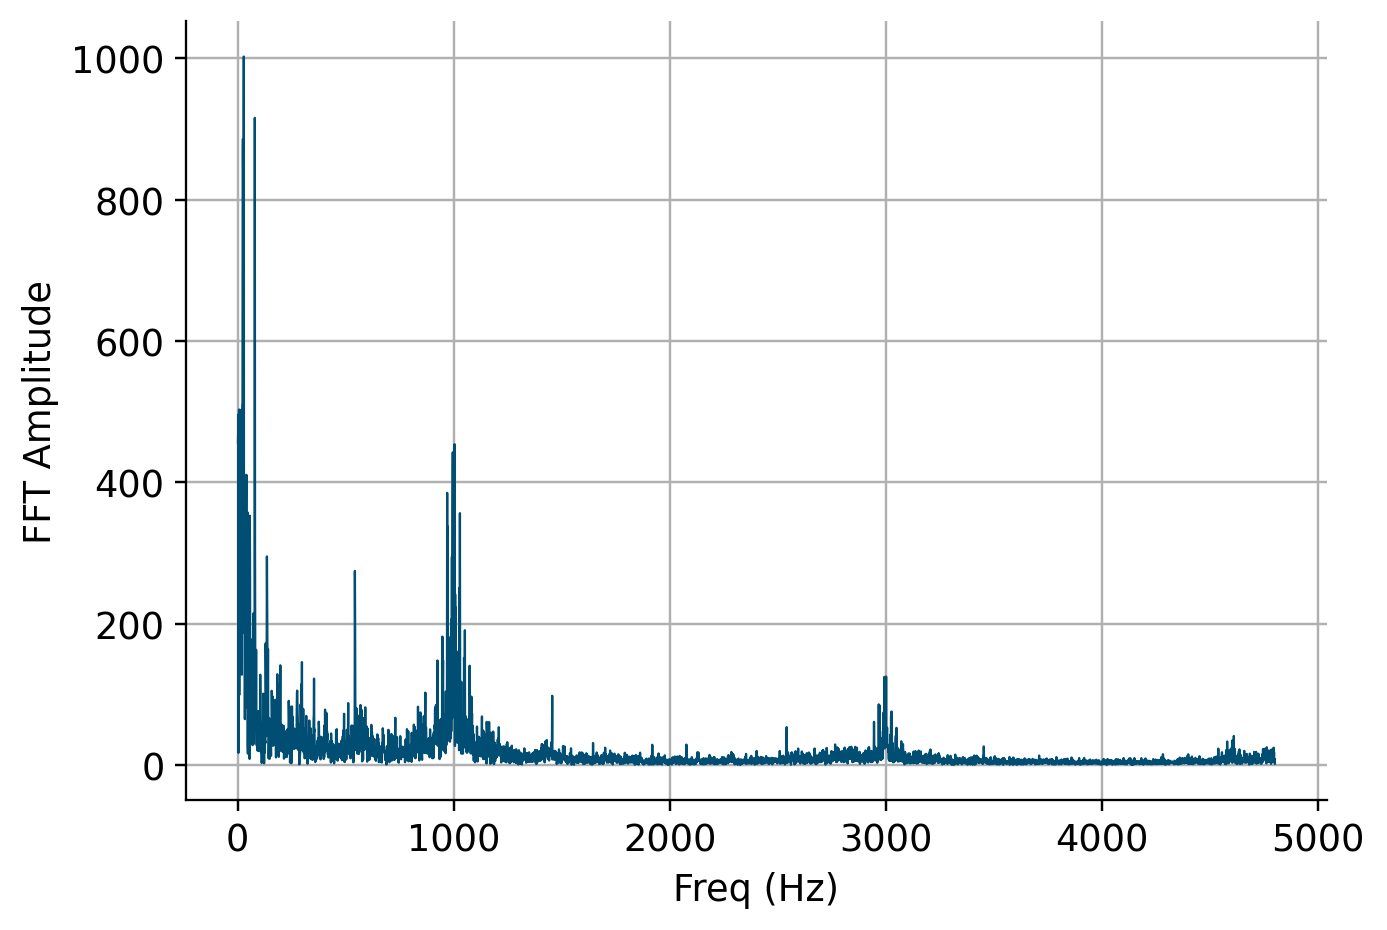

In [14]:
#calling fft function
amp, freq = my_fft(y_interp,x_interp)

#plotting resulting fft amplitude and frequency 
plt.plot(freq, amp)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude')

# creating a grid to read the data easier 
plt.grid(True)

#calculating the peak frequenzy 
max_value = max(amp)
X_abs_list = np.ndarray.tolist(amp)
max_freq = X_abs_list.index(max_value)
print(max_freq)

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Bei dem Lüfter habe ich einen höheren Frequenzwert erwartet, die Hauptfrequenz lag laut meiner Berechnungen bei genau 626 Hz. Das zu erwartende Ergebnis lag bei etwa 950hz, die Amplituden in diesem Bereich sind aber trotzdem sehr auffällig, also wurde dort dennoch etwas gemessen. 
Bei dem Handy hingegen war der zu erwartende Wert bei 25-30 Hz, ich habe 26 Hz berechnet, das ist also ein sehr gutes Ergebnis!

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der Versuch war sehr spaßig, jedoch war es bei manchen Gegenständen sehr schwierig etwas zu messen, ich haben zum Beispiel vorher eine Festplatte in Betrieb genommen und diese gemessen, dort habe ich leider kaum Ausschläge messen können. 